## Overview Steps We have Use In Our Project:
- Step 1 - Installing dependencies
- Step 2 - Importing dataset
- Step 3 - Exploratory data analysis
- Step 4 - Feature engineering (statistical features added)
- Step 5 - Implement "Catboost" model
- Step 6 - Implement Support Vector Machine + Radial Basis Function model

## EarthQuake Prediction And Estimation Of Destruction

- Predicting earthquakes has long been thought to be near-impossible. 
- Being able to predict earthquakes could allow us to better protect human life and property.


- There are many ways to compute the magnitude of an earthquake!
- A0 is the seismometer reading produced by an Earthquake of standard size (i.e., a calibration earthquake). Generally A0 is 0.001 mm. 
- This equation assumes that a distance of 100 km separates the seismometer and the epicentre
![alt text](http://1.bp.blogspot.com/-wX1aS8tcJ6U/Tby9LlQkLiI/AAAAAAAAAZI/zA16efEl_qc/s200/Picture1.png)
![alt text](http://exponential-logarithm-project.weebly.com/uploads/6/5/6/0/65601499/8320544.png?1447690096)
![alt text](https://geology.com/records/largest-earthquake/global-seismic-moment-release.gif)
![alt text](https://www.sott.net/image/s15/315072/full/ryzproductionsfuture_blogspot_.jpg)


# Step 1 - Install & Import Dependencies

In [ ]:
!pip install dc-stat-think

In [ ]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
import dc_stat_think as dcst
#machine learning

#data scaling
from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from sklearn.svm import NuSVR, SVR
#kernel ridge model
from sklearn.kernel_ridge import KernelRidge
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 - Loading Dataset

In [ ]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

Saving Earthquake[1].csv to Earthquake[1].csv


In [ ]:
df = pd.read_csv("Earthquake[1].csv")

print(df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [ ]:
df= df.drop(['updated'],axis=1)
df= df.drop(['horizontalError'],axis=1)
df= df.drop(['depthError'],axis=1)
df= df.drop(['magError'],axis=1)
df= df.drop(['magNst'],axis=1)
df= df.drop(['status'],axis=1)
df= df.drop(['locationSource'],axis=1)
df= df.drop(['magSource'],axis=1)
df= df.drop(['type'],axis=1)

In [ ]:
df.place.unique()

array(['Bhutan', 'northwestern Kashmir', 'Myanmar-India border region',
       ..., 'Arunachal Pradesh-Assam region, India',
       'Assam - Nagaland region, India',
       'Maharashtra-Karnataka border region, India'], dtype=object)

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
df.shape

(14698, 13)

In [ ]:
df1=df.reset_index()['mag']

In [ ]:
df1

0        5.5
1        4.0
2        5.6
3        4.4
4        5.0
        ... 
14693    4.6
14694    4.7
14695    4.0
14696    4.9
14697    5.2
Name: mag, Length: 14698, dtype: float64

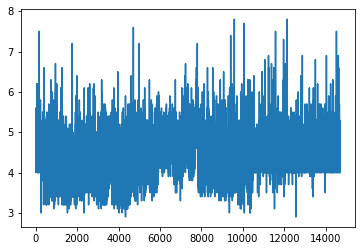

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

#### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.53061224]
 [0.2244898 ]
 [0.55102041]
 ...
 [0.2244898 ]
 [0.40816327]
 [0.46938776]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(9553, 5145)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(9452, 100)
(9452,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(5044, 100)
(5044,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
148/148 [==============================] - 32s 184ms/step - loss: 0.0112 - val_loss: 0.0076
Epoch 2/100
148/148 [==============================] - 27s 180ms/step - loss: 0.0098 - val_loss: 0.0074
Epoch 3/100
148/148 [==============================] - 26s 176ms/step - loss: 0.0098 - val_loss: 0.0074
Epoch 4/100
148/148 [==============================] - 27s 181ms/step - loss: 0.0097 - val_loss: 0.0076
Epoch 5/100
148/148 [==============================] - 26s 178ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 6/100
148/148 [==============================] - 27s 180ms/step - loss: 0.0096 - val_loss: 0.0077
Epoch 7/100
148/148 [==============================] - 27s 181ms/step - loss: 0.0097 - val_loss: 0.0075
Epoch 8/100
148/148 [==============================] - 28s 187ms/step - loss: 0.0095 - val_loss: 0.0075
Epoch 9/100
148/148 [==============================] - 26s 176ms/step - loss: 0.0095 - val_loss: 0.0074
Epoch 10/100
148/148 [==============================] - 27s 180m

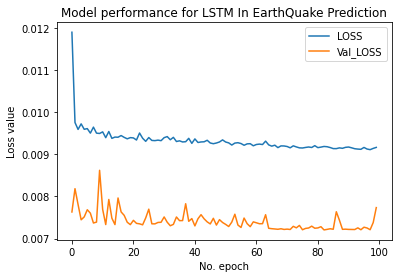

In [ ]:
# Plot history: MSE & (LOSS and Val_LOSS)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='LOSS')
plt.plot(history.history['val_loss'], label='Val_LOSS')
plt.title('Model performance for LSTM In EarthQuake Prediction')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3.964171247598356

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4.016640129376666

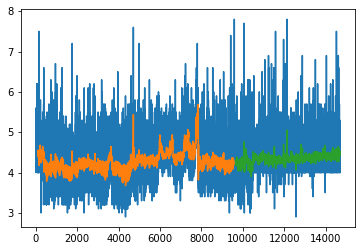

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

5145

In [ ]:
x_input=test_data[5046:].reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.26530612244897966,
 0.4285714285714285,
 0.2448979591836734,
 0.6530612244897959,
 0.2448979591836734,
 0.326530612244898,
 0.4693877551020408,
 0.40816326530612257,
 0.5102040816326531,
 0.816326530612245,
 0.40816326530612257,
 0.4693877551020408,
 0.3877551020408163,
 0.3877551020408163,
 0.3877551020408163,
 0.3673469387755103,
 0.30612244897959195,
 0.2857142857142857,
 0.22448979591836737,
 0.4285714285714285,
 0.326530612244898,
 0.40816326530612257,
 0.22448979591836737,
 0.30612244897959195,
 0.30612244897959195,
 0.7551020408163264,
 0.26530612244897966,
 0.2448979591836734,
 0.326530612244898,
 0.2857142857142857,
 0.5102040816326531,
 0.5714285714285715,
 0.2448979591836734,
 0.26530612244897966,
 0.30612244897959195,
 0.326530612244898,
 0.4285714285714285,
 0.326530612244898,
 0.326530612244898,
 0.40816326530612257,
 0.40816326530612257,
 0.326530612244898,
 0.30612244897959195,
 0.4693877551020408,
 0.326530612244898,
 0.3673469387755103,
 0.3673469387755103,
 0.3673

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} year input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} year output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)


0 year input [0.46938776 0.32653061 0.36734694 0.36734694 0.36734694 0.53061224
 0.26530612 0.44897959 0.26530612 0.28571429 0.30612245 0.28571429
 0.3877551  0.24489796 0.36734694 0.2244898  0.26530612 0.57142857
 0.34693878 0.44897959 0.28571429 0.30612245 0.40816327 0.2244898
 0.40816327 0.36734694 0.34693878 0.26530612 0.36734694 0.32653061
 0.3877551  0.26530612 0.3877551  0.26530612 0.48979592 0.24489796
 0.36734694 0.34693878 0.34693878 0.32653061 0.30612245 0.36734694
 0.42857143 0.26530612 0.3877551  0.24489796 0.44897959 0.34693878
 0.40816327 0.40816327 0.26530612 0.34693878 0.36734694 0.2244898
 0.40816327 0.46938776 0.32616693 0.32616693 0.32307282 0.32197884
 0.32113865 0.32034022 0.31958035 0.3189221  0.3184287  0.31811965
 0.31796259 0.31788704 0.31782159 0.31769621 0.31747264 0.3171424
 0.31672457 0.31625539 0.31577626 0.31532201 0.31491679 0.31456792
 0.31427547 0.31402501 0.31380126 0.31358317 0.31335476 0.31309852
 0.31282228 0.31251904 0.31219155 0.31184804 0.31149

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

14698

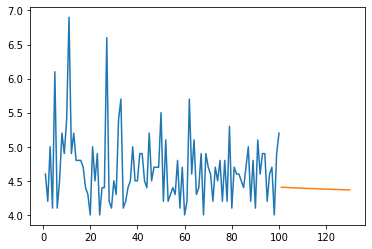

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[14598:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

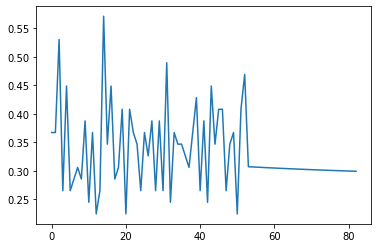

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[14645:])